In [2]:
import numpy as np
heights = np.array([150, 160, 170, 180, 155, 168, 190, 200, 205])

In [4]:
heights

array([150, 160, 170, 180, 155, 168, 190, 200, 205])

In [6]:
mean= np.mean(heights)
mean

175.33333333333334

In [7]:
sd= np.std(heights)
sd

18.55322673343433

In [10]:
standardize= (heights-mean)/sd
np.round(standardize,2)

array([-1.37, -0.83, -0.29,  0.25, -1.1 , -0.4 ,  0.79,  1.33,  1.6 ])

In [12]:
# standardize in dataset using sklearn

In [94]:
import pandas as pd

In [95]:
data= pd.read_csv("loan.csv")

In [96]:
data.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [50]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

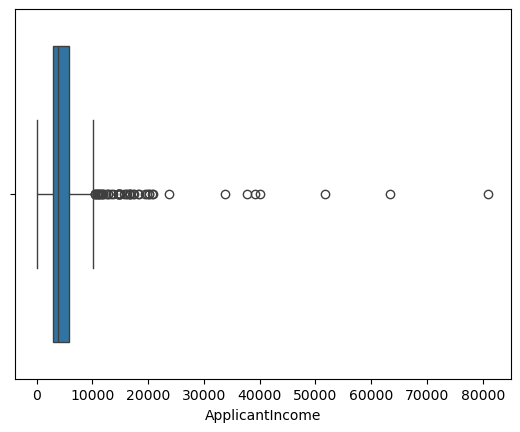

In [52]:
# for seeing outliers
sns.boxplot(data= data, x= "ApplicantIncome")
plt.show()

In [53]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [98]:
from sklearn.preprocessing import StandardScaler

In [55]:
ss= StandardScaler()

In [56]:
ss.fit(data[["ApplicantIncome"]])

StandardScaler()

In [39]:
data["ApplicantIncome"]= ss.transform(data[["ApplicantIncome"]])

In [57]:
# array to data frame
data["ApplicantIncome_ss"]= pd.DataFrame(ss.transform(data[["ApplicantIncome"]]), columns=["x"])

In [58]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728


In [59]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


In [63]:
data["ApplicantIncome_ss"].mean()

-4.3396339724761815e-18

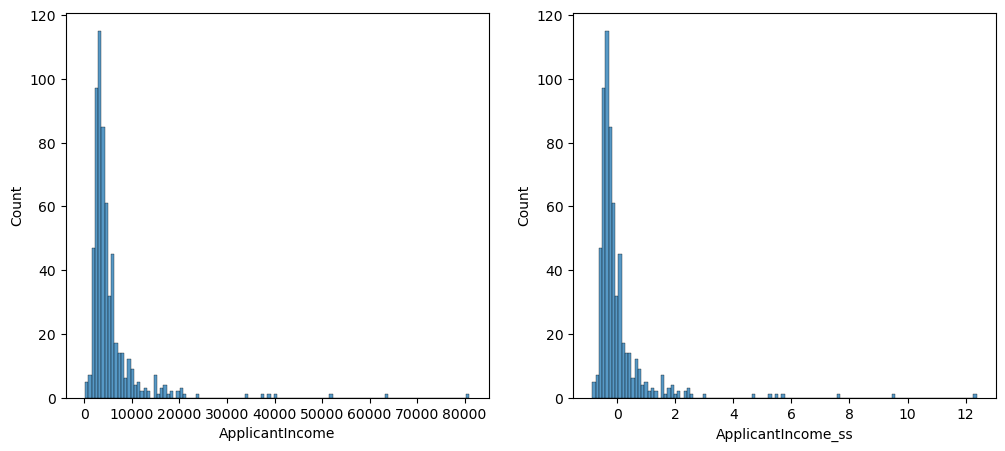

In [70]:
plt.figure(figsize= (12, 5))
plt.subplot(1,2,1)
sns.histplot(data["ApplicantIncome"])
plt.subplot(1,2,2)
sns.histplot(data["ApplicantIncome_ss"])
plt.show()

In [74]:
# normalization

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
ms= MinMaxScaler()

In [102]:
ms.fit(data[["CoapplicantIncome"]])

MinMaxScaler()

In [103]:
data["CoapplicantIncome_min"]= ms.transform(data[["CoapplicantIncome"]])

In [104]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_min
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.056592
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0.000000
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0.000000
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.005760
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.000000


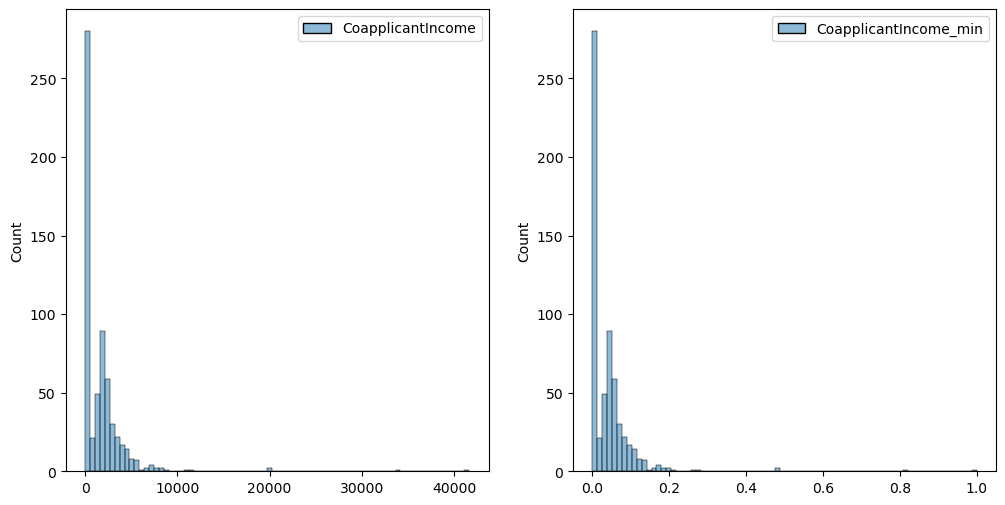

In [107]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
sns.histplot(data[["CoapplicantIncome"]])
plt.subplot(1,2,2)
sns.histplot(data[["CoapplicantIncome_min"]])
plt.show()